In [80]:
import os   #These two are useful modules
import sys

#here you can import other useful modules, such as numpy, matplotlib, etc..
import numpy as np #Numerical Python
import matplotlib.pyplot as plt

#also import astropy.fits
from astropy.io import fits

In [81]:
# Let's define te directory where you are with the "get current working directory" command...
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

#We can go up by using the path.dirname
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(main_dir,"data")
print("Data directory is %s" % data_dir)

#..and we can define some output directory with the results
results_dir = os.path.join(main_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created!" % results_dir)
else:
    print("Results directory is %s" % results_dir)

I am in dir /home/sara/Scrivania/1magistrale/multimessenger/GW/experience-gw-Sara-a-r/code
Main directory is /home/sara/Scrivania/1magistrale/multimessenger/GW/experience-gw-Sara-a-r
Data directory is /home/sara/Scrivania/1magistrale/multimessenger/GW/experience-gw-Sara-a-r/data
Results directory is /home/sara/Scrivania/1magistrale/multimessenger/GW/experience-gw-Sara-a-r/results


### Explore the GWOSC event dataset and download data

In [82]:
#Let's see the data relative to the detection that I have choose (GW150914)
#you will receive a list of files, that you could download in your data dir for future use,
#or just use the fetch command (see below) to use the files in real time 
ev_name = "GW150914"

#interferometer to use
ev_ifoH = "H1"
ev_ifoL = "L1"

from gwosc.datasets import event_gps
from gwosc.locate import get_event_urls

ev_gps = event_gps(ev_name)
event_urls = get_event_urls(ev_name)

print("Ev name: %s,\nEv_gps: %.1f,\nEv_urls: %s\n" % (ev_name,ev_gps,event_urls))

Ev name: GW150914,
Ev_gps: 1126259462.4,
Ev_urls: ['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5']



<div class="alert alert-info">All of these times are returned in the GPS time system, which counts the number of seconds that have elapsed since the start of the GPS epoch at midnight (00:00) on January 6th 1980. GWOSC provides a <a href="https://www.gw-openscience.org/gps/">GPS time converter</a> you can use to translate into datetime, or you can use <a href="https://gwpy.github.io/docs/stable/time/"><code>gwpy.time</code></a>.</div>

In [83]:
#Here we will select a time frame and see how we can have a quick look at the signal and do some basic filtering

from gwpy.timeseries import TimeSeries
from gwpy.segments import DataQualityFlag

# Select a time interval of 60 mins around the event. This is because on GWOSC there is 1 hour data window released around events
dt_win=3600*0.5 
ev_t0_min = ev_gps-dt_win
ev_t0_max = ev_gps+dt_win

print("Get data for %s (%s) GPS: %.2f - %.2f" % (ev_name,ev_ifoH,ev_t0_min,ev_t0_max))
print("Get data for %s (%s) GPS: %.2f - %.2f" % (ev_name,ev_ifoL,ev_t0_min,ev_t0_max))

#fetch the data. Use cache=True to keep the data in the cache memory (to speed things up)
dataH = TimeSeries.fetch_open_data(ev_ifoH,ev_t0_min,ev_t0_max,cache=True)
print('------------------------------------------------------------')
print(dataH)
dataL = TimeSeries.fetch_open_data(ev_ifoL,ev_t0_min,ev_t0_max,cache=True)
print('------------------------------------------------------------')
print(dataL)

#get the segments in a larger time window (just to have a bigger time span to look over)
segmentsH = DataQualityFlag.fetch_open_data(ev_ifoH+"_DATA",ev_t0_min-dt_win,ev_t0_max+dt_win)
print('Done H')
segmentsL = DataQualityFlag.fetch_open_data(ev_ifoL+"_DATA",ev_t0_min-dt_win,ev_t0_max+dt_win)
print("Done L")

Get data for GW150914 (H1) GPS: 1126257662.40 - 1126261262.40
Get data for GW150914 (L1) GPS: 1126257662.40 - 1126261262.40
------------------------------------------------------------
TimeSeries([-6.96658213e-20, -1.08006670e-19, -7.14921967e-20,
            ..., -6.30679159e-20, -5.32200643e-20,
            -7.26332994e-20]
           unit: dimensionless,
           t0: 1126257662.3999023 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
------------------------------------------------------------
TimeSeries([-1.28274696e-18, -1.29408323e-18, -1.31016529e-18,
            ..., -6.54584201e-19, -6.95868715e-19,
            -7.31839405e-19]
           unit: dimensionless,
           t0: 1126257662.3999023 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
Done H
Done L


### Noise Analysis

------------------------------------------------------------
FrequencySeries([ 2.00092867e-24+0.00000000e+00j,
                  4.43479616e-24-4.00608712e-26j,
                  4.63905976e-24+8.16892799e-26j, ...,
                  4.37653704e-27+4.32131803e-27j,
                  1.37674939e-27-1.88018389e-27j,
                 -3.29842840e-27+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.0002777777777777778 Hz,
                epoch: 1126257662.399902,
                name: Strain,
                channel: None)
------------------------------------------------------------
FrequencySeries([-1.05668394e-18+0.00000000e+00j,
                 -2.01616447e-21-2.04787205e-21j,
                 -6.96322308e-22-2.04402414e-21j, ...,
                 -3.84299485e-26+4.53028977e-28j,
                 -4.04086275e-26-2.86732849e-27j,
                 -3.91489240e-26+0.00000000e+00j]
                unit: dimensionless,
                f

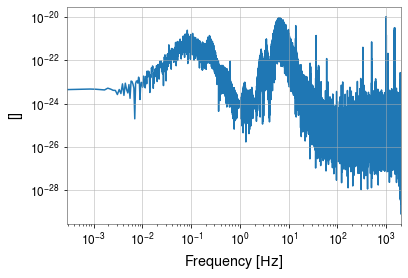

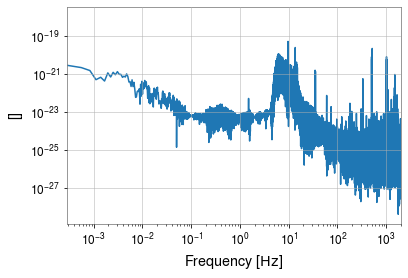

In [84]:
#Build the fft of our TimeSeries and plot it
fft_dataH = dataH.fft()
print('------------------------------------------------------------')
print(fft_dataH)

fft_dataL = dataL.fft()
print('------------------------------------------------------------')
print(fft_dataL)

#The result is a FrequencySeries, with complex amplitude, representing the amplitude and phase 
#of each frequency in our data. We can use abs() to extract the amplitude and plot that:

fft_plotH = fft_dataH.abs().plot(xscale="log", yscale="log")
fft_plotL = fft_dataL.abs().plot(xscale="log", yscale="log")


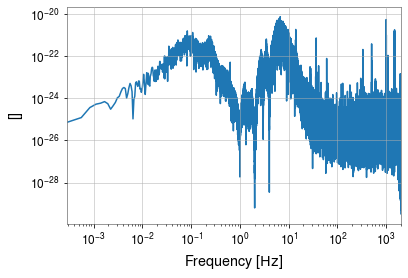

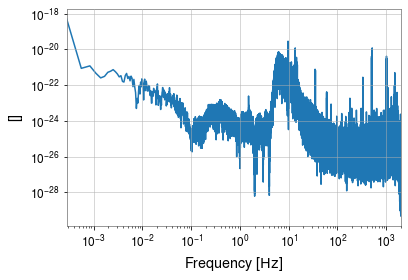

In [85]:
# This doesn't look correct at all! The problem is that the FFT works under the assumption that 
# our data are periodic, which means that the edges of our data look like discontinuities when transformed. 
# We need to apply a window function to our time-domain data before transforming, which we can do using the
#'scipy.signal' module. We will use the hann window (nota come 'finestra  a coseno rialzato')

from scipy.signal import get_window

#-------------------------------HANFORD---------------------------------------

windowH = get_window('hann', dataH.size)
hwinH = dataH * windowH

fftampH = hwinH.fft().abs()
plotH = fftampH.plot(xscale="log", yscale="log")

#--------------------------------LIVINGSTON-----------------------------------

windowL = get_window('hann', dataL.size)
hwinL = dataL * windowL

fftampL = hwinL.fft().abs()
plotL = fftampL.plot(xscale="log", yscale="log")


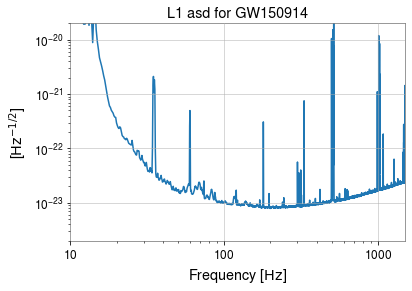

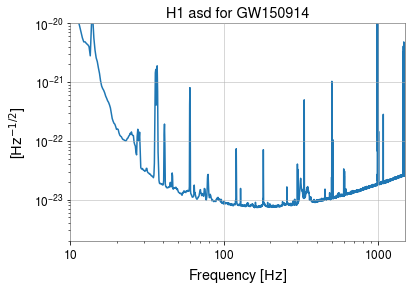

In [86]:
#-----------------------------CALCULATING THE POWER SPECTRAL DENSITY------------------------------
#In practice, we typically use a large number of FFTs to estimate an average power spectral density over a 
#long period of data. We can do this using the asd() method, which uses Welch's method to combine FFTs 
#of overlapping, windowed (window of 4 seconds) chunks (blocchi) of data.

#-------------------------------LIVINGSTON---------------------------------------

asdL = dataL.asd(fftlength=4, method="median")
plotL = asdL.plot()

ax = plotL.gca()
ax.set_xlim(10, 1500)
ax.set_ylim(2e-24, 2e-20)
ax.set_title(ev_ifoL+ " asd for "+ev_name)
plotL.refresh()

#-------------------------------HANFORD---------------------------------------

asdH = dataH.asd(fftlength=4, method="median")
plotH = asdH.plot()

ax = plotH.gca()
ax.set_xlim(10, 1500)
ax.set_ylim(2e-24, 1e-20)
ax.set_title(ev_ifoH+ " asd for "+ev_name)
plotH.refresh()


The ASD is a standard tool used to study the frequency-domain sensitivity of a gravitational-wave detector.
For the LIGO-Livingston data we loaded, we can see large spikes at certain frequencies (see the image)

The [O2 spectral lines](https://www.gw-openscience.org/o2speclines/) (and the  [O1 spectral lines](https://www.gw-openscience.org/o1speclines/)) page on GWOSC describes a number of these spectral features for O2, with some of them being forced upon us, and some being deliberately introduced to help with interferometer control.

Loading more data allows for more FFTs to be averaged during the ASD calculation, meaning random variations get averaged out, and we can see more detail:

Now we can see some more features, including sets of lines around ~30 Hz and ~65 Hz, and some more isolated lines through the more sensitive region.

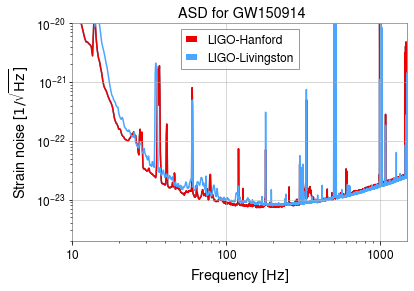

In [87]:
#For comparison, we can plot the LIGO-Hanford and LIGO-Livingston data together

# and plot using standard colours
ax.plot(asdH, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(asdL, label='LIGO-Livingston', color='gwpy:ligo-livingston')

# update the Livingston line to use standard colour, and have a label
#lline = ax.lines[0]
#lline.set_color('gwpy:ligo-livingston')  # change colour of Livingston data
#lline.set_label('LIGO-Livingston')

ax.set_title(" ASD for "+ev_name)
ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()
plotH

#save figure in results directory
out_name = os.path.join(results_dir,"asd.png")
plotH.savefig(out_name, dpi = 200)
plotH
#plotH.refresh()


## Showing the time-evolution of FFTs

The FFT, and the ASD, show us a snapshot of the frequency-domain content of our signal, referred to a single time interval.
It is commonly useful to show how this frequency-domain content evolves over time.

For this we use spectrograms, which show the FFT (or ASD) at each time step on a time-frequency representation.
The `TimeSeries` in GWpy includes two methods for this:

- [`spectrogram()`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.spectrogram) - which includses a `stride` parameter, and shows an averaged ASD every time interval corresponding to each stride, and 
- [`spectrogram2()`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.spectrogram2) - shows a single-FFT ASD, defined by its `fftlength`, at each time step. These FFTs can include overlapping segments of tdata, as specified by the `overlap` parameter.

Which one should I use? The short answer is use `spectrogram2()` for short(ish) chunks of data, less than a minute or so, and `spectrogram()` for longer chunks where the averaging helps remove very short noise bursts.

The long answer is that averaging the FFTs comuted each stride of data reduces the variance of the resulting ASD estimate. However, these averages also reduce the time resolution of the corresponding spectrogram, which is no more `fftlength` $-$ `overlap` but is now determined by the duration of the `stride`. This is called [Welch's spectral density estimation method](https://en.wikipedia.org/wiki/Welch%27s_method). 
The choice of the overalp is instead determined by how independent we want our FFTs to be (no overlap) and how dense we want them to be (`overlap` equals to a large fraction of `fftlegth`). Refer to this [GWpy example](https://gwpy.github.io/docs/stable/examples/spectrogram/spectrogram2.html) on an over-dense spectrogam of GW150914.

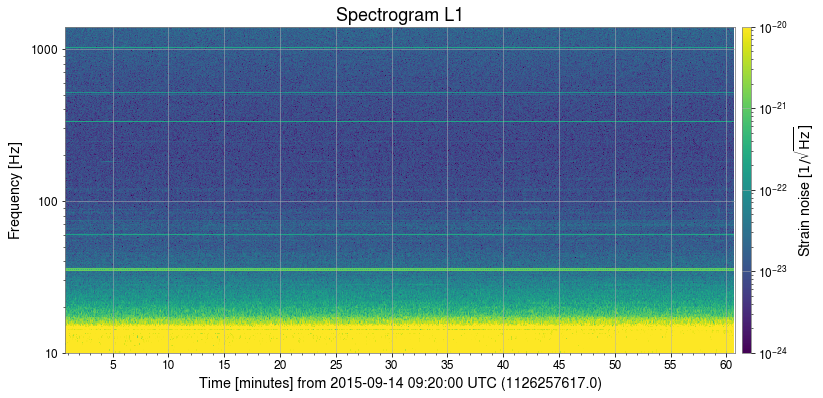

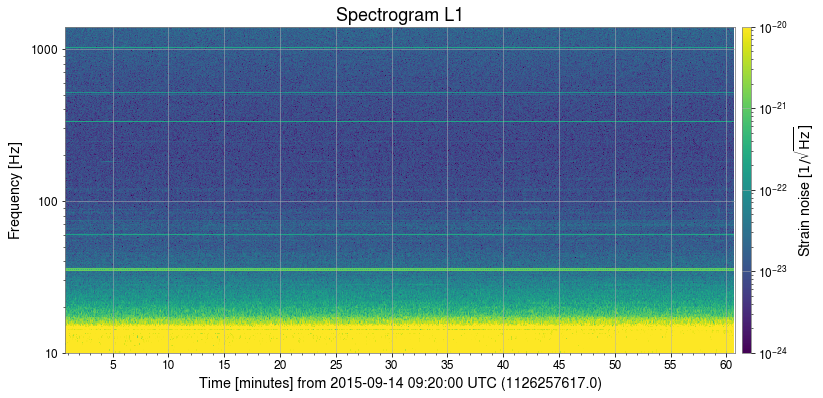

In [90]:
#NOTE = Each of these methods returns the output as stacked power spectral densities, so we take the square root 
#to get back to a familiar amplitude spectral density

#-------------------------------LIVINGSTON---------------------------------------

specgram = dataL.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()


ax = plot.gca()
ax.set_title('Spectrogram L1', fontsize = 18)
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)

#save figure in results directory
out_name = os.path.join(results_dir,"specL1.png")
plot.savefig(out_name, dpi = 200)
plot
#plot  # refresh

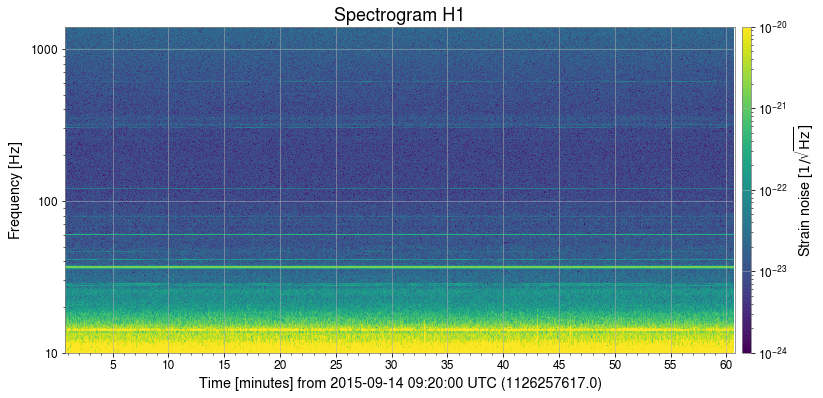

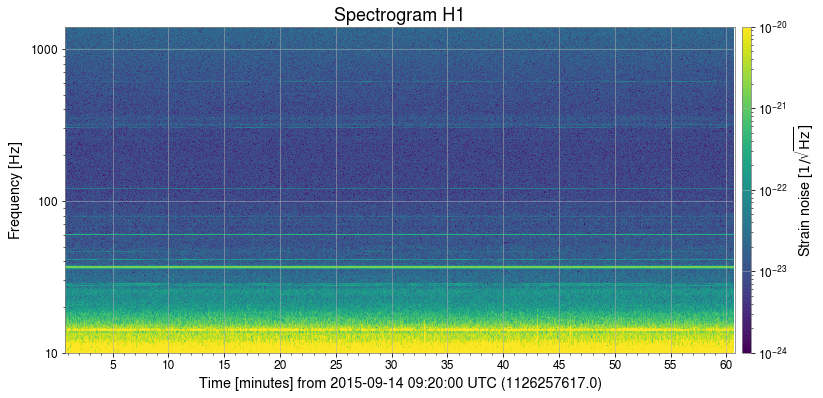

In [91]:
#-------------------------------HANFORD---------------------------------------

specgramH = dataH.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plotH = specgramH.plot()

ax = plotH.gca()
ax.set_title('Spectrogram H1', fontsize = 18)
ax.set_yscale('log')
ax.set_ylim(10, 1400)
#ax.set_xlim(ev_gps-8, ev_gps+8)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]")
#save figure in results directory
out_name = os.path.join(results_dir,"specH1.png")
plotH.savefig(out_name, dpi = 200)
plotH
#plotH  # refresh

Here we can see how the ASD for LIGO-Livingston evolves over a ~60 minute span around GW150914. Four order of magnitudes in the ASD intensity are involved, and this is way the previous attempt (without using log scale) resulted in a (almost) fully dark blue image.

We can see that the low-frequency noise (<30 Hz) rumbles along with some variation, but high frequencies (>100 Hz) are relatively stable.

In [92]:
#let's see how spectrogram is done

print(len(specgramH)) #means you are considering 3600s (60 minutes) samplind intervals of 2s
print(len(specgramH[0])) #are the values of ASD in 2s for frequencies from 0 to 2048Hz (with df=0.25Hz)
                         #infact 2048/0.25 = 8192
print('---------------------------------------------------')
print(specgram)
print('---------------------------------------------------')

1800
8193
---------------------------------------------------
Spectrogram([[1.33197612e-21, 1.01160563e-21, 1.37495839e-22,
              ..., 7.96272688e-26, 1.78620823e-25,
              9.71440004e-26],
             [3.48902466e-21, 2.42905653e-21, 1.12497987e-22,
              ..., 6.46808067e-26, 2.52479045e-25,
              2.41697354e-25],
             [3.61243429e-21, 2.62549158e-21, 2.11670113e-22,
              ..., 9.20228240e-26, 1.81873763e-25,
              1.66336489e-25],
             ...,
             [2.74447234e-21, 1.87619056e-21, 2.03086778e-22,
              ..., 1.31295641e-25, 1.16806464e-25,
              1.02590296e-25],
             [2.12892149e-21, 1.47221530e-21, 1.74589657e-22,
              ..., 9.57413095e-26, 6.13016771e-26,
              7.72489387e-26],
             [1.14492935e-21, 8.73345157e-22, 1.78071004e-22,
              ..., 1.10163223e-25, 2.32044689e-26,
              3.77992638e-26]]
            unit: 1 / Hz(1/2),
            name: Strain,

In [93]:
#--------------------------------CALCULATING MEAN AND STD OF NOISE----------------------------------

#transform spectrogram in numpy array (row = time, col = frequency)
specgramH = np.asarray(specgramH)
specgramL = np.asarray(specgram)

#transpose matrix : row = frequency, col = time
sgramT_H = specgramH.T
sgramT_L = specgramL.T

#select frequency from 0 to 1000 Hz and transpose again
specgramH = sgramT_H[0:4001].T
specgramL = sgramT_L[0:4001].T

In [94]:
#inizialize a matrix
row = 1800  #inervals of 2s for 1h 
col = 100   #intervals of 10Hz from 0 to 1000Hz

meanH = np.zeros((row,col))   #1000/10=100 'cause I consider intervals of 10Hz
stdH = np.zeros((row,col))

meanL = np.zeros((row,col))  #1000/10=100 'cause I consider intervals of 10Hz
stdL = np.zeros((row,col)) 


#calculating mean and std of ASD in intervals of 10 Hz

f = 0   #consider intervals of 10 Hz 
for t in range (0,row):   #t is time from 0 to 1800s (sample all time (60 minutes) in intervals of 2 s)
    f = 0
    for i in range (0,col):
        meanH[t][i] = np.mean(specgramH[t][f:(f+40)])    #[f:f+40] because df = 0.25, so 10/0.25 = 40
        stdH[t][i] = np.std(specgramH[t][f:(f+40)])
        #LIVINGSTON
        meanL[t][i] = np.mean(specgramL[t][f:(f+40)])    
        stdL[t][i] = np.std(specgramL[t][f:(f+40)])
        f = f + 40

In [95]:
#let's see for each frequency band how many points are over 3 sigma during the hour

countL = np.zeros((row,col))
countH = np.zeros((row,col))

f = 0   
for t in range (0,row):   
    f = 0
    for i in range (0,col):
        over3sigmaH = 0
        over3sigmaH = specgramH[t][f:f+40][specgramH[t][f:f+40]>= meanH[t][i]+3*stdH[t][i]]
        countH[t][i] = len(over3sigmaH)
        over3sigmaL = 0
        over3sigmaL = specgramL[t][f:f+40][specgramL[t][f:f+40]>= meanL[t][i]+3*stdL[t][i]]
        countL[t][i] = len(over3sigmaL) 
        f = f + 40

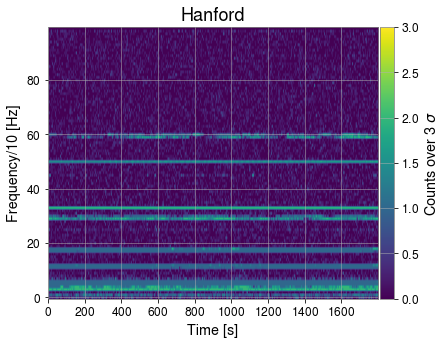

In [99]:
#-------------------------------HANFORD---------------------------------------
plt.figure(figsize = (7,5))
plt.imshow(countH.T, cmap='viridis', aspect='auto', origin='lower')
cbar = plt.colorbar(pad = 0.005, label='Counts over 3 $\sigma$')
plt.xlabel('Time [s]')
plt.ylabel('Frequency/10 [Hz]')
plt.title('Hanford', fontsize=18)

#save figure in results directory
out_name = os.path.join(results_dir,"countH1.png")
plt.savefig(out_name, dpi = 200)
plt.show()

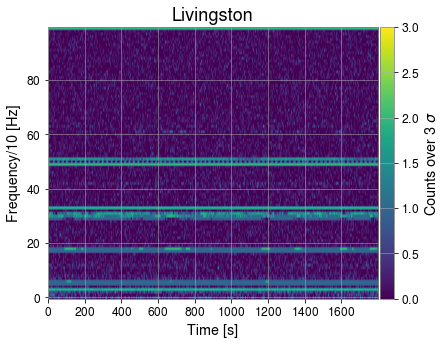

In [100]:
#-------------------------------LIVINGSTON---------------------------------------

plt.figure(figsize = (7,5))
plt.imshow(countL.T, cmap='viridis', aspect='auto', origin='lower')
cbar = plt.colorbar(pad = 0.005,label='Counts over 3 $\sigma$')
plt.ylabel('Frequency/10 [Hz]')
plt.xlabel('Time [s]')
plt.title('Livingston', fontsize=18)

#save figure in results directory
out_name = os.path.join(results_dir,"countL1.png")
plt.savefig(out_name, dpi = 200)
plt.show()